## learning_rate 에 따른 학습
- Case1 : learning_rate = 0.1
- Case2 : learning_rate = 1.5
- Case3 : learning_rate = 1e-5

### Case1 : learning_rate = 0.1

In [4]:
from tqdm import tqdm_notebook
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

learning_rate = 0.1

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy   = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [5]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(201)):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 4.536120414733887 
 Weight : 
[[-1.0684217   0.78146774  1.2702483 ]
 [ 1.3805251   1.1117564  -0.945031  ]
 [-0.64199984 -1.0010467  -0.9006645 ]]

 Step : 20 
 Cost : 1.0336236953735352 
 Weight : 
[[-1.2362244   0.5305092   1.6890093 ]
 [ 0.92547345  0.5995444   0.02223267]
 [-0.90003335 -1.0532573  -0.5904203 ]]

 Step : 40 
 Cost : 0.8368585109710693 
 Weight : 
[[-1.3268209   0.40004876  1.910066  ]
 [ 0.8295872   0.46504766  0.25261572]
 [-0.7752031  -0.86927366 -0.8992343 ]]

 Step : 60 
 Cost : 0.746263325214386 
 Weight : 
[[-1.4129989   0.30010444  2.0961885 ]
 [ 0.7634871   0.4230427   0.36072057]
 [-0.67249227 -0.7852348  -1.0859839 ]]

 Step : 80 
 Cost : 0.6942170858383179 
 Weight : 
[[-1.4956346   0.22442693  2.2545016 ]
 [ 0.7198366   0.41781348  0.40960038]
 [-0.5929298  -0.7455856  -1.2051957 ]]

 Step : 100 
 Cost : 0.6588690280914307 
 Weight : 
[[-1.5756699   0.16674821  2.3922162 ]
 [ 0.69244117  0.42465964  0.43014985]
 [-0.5313173  -0.72495

### Case2 : learning_rate = 1.5 

In [6]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1.5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [7]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0 or step<5:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))
    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 3.1290576457977295 
 Weight : 
[[-1.0138175   0.13082397  2.1564288 ]
 [ 2.519365   -3.3371594   1.0621253 ]
 [ 3.2201056  -1.9236073   1.1348552 ]]

 Step : 1 
 Cost : 22.944168090820312 
 Weight : 
[[-2.1261158   0.69332397  2.7062273 ]
 [-1.5798447  -0.7121594   2.5363357 ]
 [-0.89178133  0.88889265  2.4342427 ]]

 Step : 2 
 Cost : 23.602142333984375 
 Weight : 
[[-1.7511158  1.2558229  1.7687284]
 [ 0.8576553  1.9128385 -2.5261624]
 [ 1.5457187  3.7013917 -2.8157563]]

 Step : 3 
 Cost : 15.480286598205566 
 Weight : 
[[-1.3764788   0.318686    2.3312283 ]
 [ 3.294415   -2.023921   -1.0261626 ]
 [ 3.9828405  -0.04823017 -1.5032564 ]]

 Step : 4 
 Cost : 24.930477142333984 
 Weight : 
[[-2.5014744   0.88118595  2.893724  ]
 [-0.8305764   0.601079    0.47382903]
 [-0.14215517  2.7642698  -0.19076061]]

 Step : 20 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]

 Step : 40 
 Cost : nan 
 Weight : 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]

### Case3 : learning_rate = 1e-5

In [12]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

learning_rate = 1e-5

x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [13]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step%20 == 0:
            print("\n Step : {} \n Cost : {} \n Weight : \n{}".format(step, cost_val, W_val))

    print("-"*60)
    # predict
    print("Prediction \t:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy \t: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


 Step : 0 
 Cost : 3.456878185272217 
 Weight : 
[[ 1.0042118  -2.1880436  -0.911383  ]
 [ 1.6207315  -0.06806801  2.578161  ]
 [-1.5332353   1.1768539  -1.0610433 ]]

 Step : 20 
 Cost : 3.45285701751709 
 Weight : 
[[ 1.0042523 -2.1880102 -0.9114533]
 [ 1.6210319 -0.0678333  2.577627 ]
 [-1.5329254  1.1770256 -1.0615249]]

 Step : 40 
 Cost : 3.4488391876220703 
 Weight : 
[[ 1.0042928  -2.1879768  -0.91152364]
 [ 1.6213323  -0.06759885  2.577093  ]
 [-1.5326154   1.1771972  -1.0620065 ]]

 Step : 60 
 Cost : 3.444823741912842 
 Weight : 
[[ 1.0043334  -2.1879435  -0.911594  ]
 [ 1.6216327  -0.06736467  2.5765588 ]
 [-1.5323055   1.1773689  -1.0624881 ]]

 Step : 80 
 Cost : 3.440812110900879 
 Weight : 
[[ 1.0043739  -2.18791    -0.9116643 ]
 [ 1.6219331  -0.06713074  2.5760248 ]
 [-1.5319955   1.1775393  -1.0629697 ]]

 Step : 100 
 Cost : 3.4368085861206055 
 Weight : 
[[ 1.0044144  -2.1878767  -0.91173464]
 [ 1.6222335  -0.06689708  2.5754907 ]
 [-1.5316856   1.1777086  -1.06344

### Data(x) preprocessing for gradient descent

In [14]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])
# print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(" x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 x_data : 
[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02]]  

 y_data : 
[[831.659973]
 [828.070007]
 [824.159973]
 [819.23999 ]
 [818.97998 ]
 [820.450012]
 [813.669983]
 [809.559998]]


In [15]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print("Step : {}, \t Cost : {}".format(step, cost_val))
    # print("\n step : {}, \n Cost : {} \n Prediction : {}".format(step, cost_val, hy_val))

Step : 0, 	 Cost : 2859054661632.0
Step : 1, 	 Cost : 3.1411874338828935e+27
Step : 2, 	 Cost : inf
Step : 3, 	 Cost : inf
Step : 4, 	 Cost : inf
Step : 5, 	 Cost : inf
Step : 6, 	 Cost : nan
Step : 7, 	 Cost : nan
Step : 8, 	 Cost : nan
Step : 9, 	 Cost : nan
Step : 10, 	 Cost : nan
Step : 11, 	 Cost : nan
Step : 12, 	 Cost : nan
Step : 13, 	 Cost : nan
Step : 14, 	 Cost : nan
Step : 15, 	 Cost : nan
Step : 16, 	 Cost : nan
Step : 17, 	 Cost : nan
Step : 18, 	 Cost : nan
Step : 19, 	 Cost : nan
Step : 20, 	 Cost : nan
Step : 21, 	 Cost : nan
Step : 22, 	 Cost : nan
Step : 23, 	 Cost : nan
Step : 24, 	 Cost : nan
Step : 25, 	 Cost : nan
Step : 26, 	 Cost : nan
Step : 27, 	 Cost : nan
Step : 28, 	 Cost : nan
Step : 29, 	 Cost : nan
Step : 30, 	 Cost : nan
Step : 31, 	 Cost : nan
Step : 32, 	 Cost : nan
Step : 33, 	 Cost : nan
Step : 34, 	 Cost : nan
Step : 35, 	 Cost : nan
Step : 36, 	 Cost : nan
Step : 37, 	 Cost : nan
Step : 38, 	 Cost : nan
Step : 39, 	 Cost : nan
Step : 40, 	 Cost :

### Linear regression with min, max
- 위 처럼 데이터간 값 차이가 너무 큰 경우 nan이 떠버림
- 그걸 해결하기 위해 min max 이용

In [16]:
a = np.arange(4).reshape((2,2))
a

array([[0, 1],
       [2, 3]])

In [17]:
np.min(a)

0

In [18]:
np.min(a, axis=0)

array([0, 1])

In [19]:
np.min(a, axis=1)

array([0, 2])

In [20]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n\n min.data :\n {min}, \n\n numerator :\n {numerator}, \n\n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))

    # noise term prevents the zero division
    return numerator / (denominator + 1e-5)


xy = np.array([[828.659973, 833.450012, 908100,  828.349976, 831.659973],
               [823.02002,  828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998,  824.159973],
               [816,        820.958984, 1008100, 815.48999,  819.23999 ],
               [819.359985, 823,        1188100, 818.469971, 818.97998 ],
               [819,        823,        1198100, 816,        820.450012],
               [811.700012, 815.25,     1098100, 809.780029, 813.669983],
               [809.51001,  816.659973, 1398100, 804.539978, 809.559998]])

# print("np.max(xy, 0) :", np.max(xy, 0))
# print("np.min(xy, 0) :", np.min(xy, 0))

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(" xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print("\n x_data : \n{}  \n\n y_data : \n{}".format(x_data, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

 max.data :
 [8.28659973e+02 8.33450012e+02 1.82810000e+06 8.28349976e+02
 8.31659973e+02], 

 min.data :
 [8.09510010e+02 8.15250000e+02 9.08100000e+05 8.04539978e+02
 8.09559998e+02], 

 numerator :
 [[1.9149963e+01 1.8200012e+01 0.0000000e+00 2.3809998e+01 2.2099975e+01]
 [1.3510010e+01 1.2820007e+01 9.2000000e+05 1.7115051e+01 1.8510009e+01]
 [1.0419983e+01 9.1500240e+00 5.3000000e+05 1.4440002e+01 1.4599975e+01]
 [6.4899900e+00 5.7089840e+00 1.0000000e+05 1.0950012e+01 9.6799920e+00]
 [9.8499750e+00 7.7500000e+00 2.8000000e+05 1.3929993e+01 9.4199820e+00]
 [9.4899900e+00 7.7500000e+00 2.9000000e+05 1.1460022e+01 1.0890014e+01]
 [2.1900020e+00 0.0000000e+00 1.9000000e+05 5.2400510e+00 4.1099850e+00]
 [0.0000000e+00 1.4099730e+00 4.9000000e+05 0.0000000e+00 0.0000000e+00]], 

 denominator :
 [1.9149963e+01 1.8200012e+01 9.2000000e+05 2.3809998e+01 2.2099975e+01] 

 xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) 
 [[0.99999948 0.99999945 0.         0.99999958 0.99999955]
 [

In [21]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

prev_cost = 1
for step in tqdm_notebook(range(1001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    
    if step%10 == 0:
        # print("\nStep", step, "\nCost:", cost_val, "\nPrediction:\n", hy_val)
        # print("Step : {}, \t Cost : {}".format(step, cost_val))
        improvement =  prev_cost - cost_val
        prev_cost = cost_val
        print("Step : {}, \t Cost : {}, \t Improvement : {}".format(step, cost_val,  improvement))

Step : 0, 	 Cost : 1.1190135478973389, 	 Improvement : -0.11901354789733887
Step : 10, 	 Cost : 1.1183431148529053, 	 Improvement : 0.0006704330444335938
Step : 20, 	 Cost : 1.1176725625991821, 	 Improvement : 0.0006705522537231445
Step : 30, 	 Cost : 1.1170027256011963, 	 Improvement : 0.0006698369979858398
Step : 40, 	 Cost : 1.1163330078125, 	 Improvement : 0.0006697177886962891
Step : 50, 	 Cost : 1.115663766860962, 	 Improvement : 0.0006692409515380859
Step : 60, 	 Cost : 1.1149952411651611, 	 Improvement : 0.0006685256958007812
Step : 70, 	 Cost : 1.1143275499343872, 	 Improvement : 0.0006676912307739258
Step : 80, 	 Cost : 1.1136600971221924, 	 Improvement : 0.0006674528121948242
Step : 90, 	 Cost : 1.112992763519287, 	 Improvement : 0.0006673336029052734
Step : 100, 	 Cost : 1.11232590675354, 	 Improvement : 0.0006668567657470703
Step : 110, 	 Cost : 1.1116594076156616, 	 Improvement : 0.000666499137878418
Step : 120, 	 Cost : 1.1109933853149414, 	 Improvement : 0.0006660223007

## Mnist Introduction

In [2]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

C:\Python\Anaconda3-52\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official

In [4]:
# Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
# 맨처음 최초한번만 mnist 다운로딩 이후는 로컬데이터 사용
mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784L
X = tf.placeholder(tf.float32, [None, 784])

# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


### Training epoch / batch
- epoch : one forward pass and one backward pass of all the training examples
- batch : the number of training examples in one forward/backward pass
- iterations : number of passes, each pass using [batch size] number of examples 

- Ex. 
- if you have 1000 training examples, and your batch size is 500, 
- then it will take 2 iterations to complete 1 epoch.


In [5]:
mnist.train.num_examples

55000

Epoch: 0001	Cost = 3.025496091
Epoch: 0002	Cost = 1.125004700
Epoch: 0003	Cost = 0.888953560
Epoch: 0004	Cost = 0.776706756
Epoch: 0005	Cost = 0.706697467
Epoch: 0006	Cost = 0.657088381
Epoch: 0007	Cost = 0.620253639
Epoch: 0008	Cost = 0.590116817
Epoch: 0009	Cost = 0.565768591
Epoch: 0010	Cost = 0.544986119
Epoch: 0011	Cost = 0.527694737
Epoch: 0012	Cost = 0.512255847
Epoch: 0013	Cost = 0.498603836
Epoch: 0014	Cost = 0.486037421
Epoch: 0015	Cost = 0.475801935
Learning finished
----------------------------------------------------------------
Accuracy:  0.8883
Label:  [5]
Prediction:  [5]


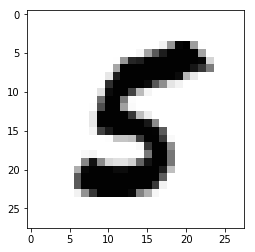

In [12]:
# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        # print('Epoch:', '%04d' % (epoch + 1),
        #       '\t cost =', '{:.9f}'.format(avg_cost))
        print('Epoch:', '%04d' % (epoch + 1), end='\t')
        print('Cost =', '{:.9f}'.format(avg_cost))

        
    print("Learning finished")
    print("-"*2**6)

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

In [15]:
# parameters
training_epochs = 15
batch_size = 100

sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
                        X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
        
        if i % (total_batch/100) == 0:
            print('▒', end='')
    
    print(' 100% ')
    print('Epoch:', '%04d' % (epoch + 1), end='\t')
    print('Cost =', '{:.9f}'.format(avg_cost))

print()
print("Learning finished")

# Test the model using test sets
# print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
#       X: mnist.test.images, Y: mnist.test.labels}))

▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0001	Cost = 3.024248589
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0002	Cost = 1.127673773
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0003	Cost = 0.889891820
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0004	Cost = 0.777442278
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0005	Cost = 0.706969990
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0006	Cost = 0.657456794
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0007	Cost = 0.620246396
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0008	Cost = 0.590212452
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0009	Cost = 0.564906983
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0010	Cost = 0.545165515
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒ 100% 
Epoch: 0011	Cost = 0.527388501
▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒

### Report result on test dataset

In [16]:
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:  0.8881


### Sample image show and prediction
- 랜덤하게 읽어온 이미지를 예측하여 실제 맞는지를 확인한다.

Label:  [3]
Prediction:  [2]


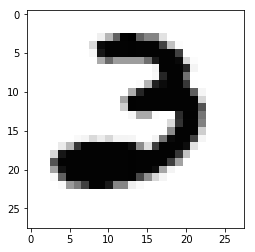

In [20]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()